# Steven Granaturov Week 3 Assignment #


| Model             | Train  | Test  | Heaviest Weights                                            |
|-------------------|--------|-------|-------------------------------------------------------------|
| No Regularization |98.340% |98.376%|['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']   |
| L1 Regularization |99.978% |99.967%|['diff_srv_rate', 'wrong_fragment', 'logged_in']             |
| L2 Regularization |98.340% |98.376%|['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']   |

<br>

| L2 Regularization | C=.001 | C=.01  | C=.1   | C=1    | C=10   | C=100  |
|-------------------|--------|--------|--------|--------|--------|--------|
| Train Score       |98.355% |98.322% |98.335% |98.340% |98.348% |98.350% |
| Test Score        |98.388% |98.357% |98.371% |98.376% |98.384% |98.384% |

<br>

 - Generally, a low regularization strength (high value of C) entails the model to capture noise and outliers of the data which may lead to a high training accuracy due to memorization. Because the model ends up memorizing the data, the test accuracy may be lower and the model is prone to overfitting.

 - A high regularization strength (low value of C) allows the model to attempt to keep the weights as small as possible which allows the model to be much simpler. However, this allows for bias. Generally, there is a lower training accuracy but a high test accuracy and the model isn't as likely to overfit.

 - A regularization thats somewhat in between the low generalization strength and a high generalization strength seems like the best of both worlds. It balances complexity of the model along with fitting the model.The training and testing accuracy will be more balanced.

#### Imports and Load Data ####

In [16]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("kddcup99.csv")

#### Removing entries with label = "normal" ####

In [17]:
df2 = df.copy()

df = df[df['label'] != "normal"]

X = df.iloc[: , :41]
y = df.iloc[:, 41:]

print(y)

IC = np.unique(y)

print(IC)

print(len(X))
print(len(y))

                  label
744     buffer_overflow
745     buffer_overflow
4049         loadmodule
4113               perl
7601            neptune
...                 ...
490959         teardrop
490960         teardrop
490961         teardrop
490962         teardrop
490963         teardrop

[396743 rows x 1 columns]
['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'perl' 'phf' 'pod'
 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop' 'warezclient'
 'warezmaster']
396743
396743


#### Replace labels from string to unique integers classifying each label ####

In [18]:
vals, df['label'] = np.unique(df['label'].values, return_inverse=True)

y = df.iloc[:, 41:]

print(vals)
print(y)

print(y.shape)

['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'perl' 'phf' 'pod'
 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop' 'warezclient'
 'warezmaster']
        label
744         1
745         1
4049        7
4113       11
7601        9
...       ...
490959     19
490960     19
490961     19
490962     19
490963     19

[396743 rows x 1 columns]
(396743, 1)


#### Replace protocol_type, service, flag strings to unique integers ####

In [19]:
vals1, df['protocol_type'] = np.unique(df['protocol_type'].values, return_inverse=True)
vals2, df['service'] = np.unique(df['service'].values, return_inverse=True)
vals3, df['flag'] = np.unique(df['flag'].values, return_inverse=True)

X = df.iloc[: , :41]


#### Scale data ####

In [20]:
from sklearn.preprocessing import scale
# Scale the data
Xs = scale(X)

#### Dimensions of Xw ####

In [21]:
x_labels_w = X.columns[:]
Xw = np.array(X[x_labels_w].values)

print("Matrix dimensions of Xw is " + str(Xw.shape))

Matrix dimensions of Xw is (396743, 41)


#### Determine heaviest weights for each probe attack ####

396743


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']
['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']
['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']
['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']


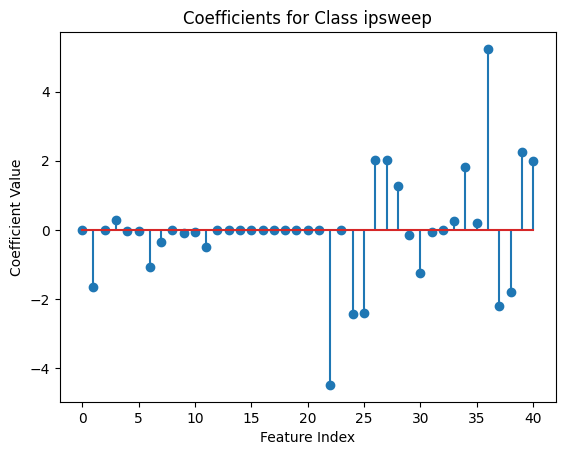

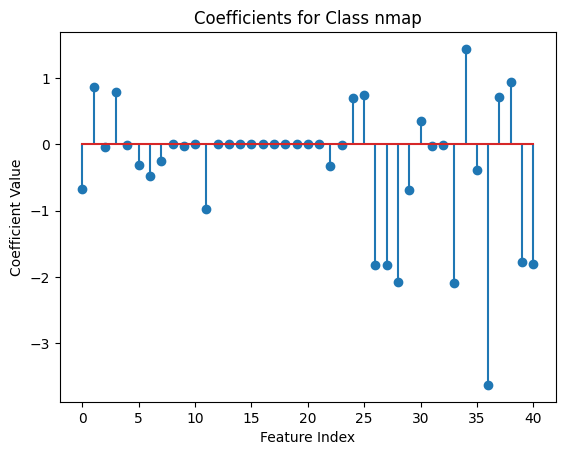

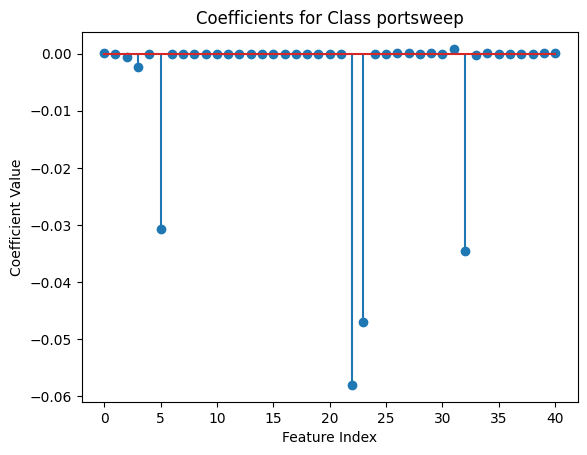

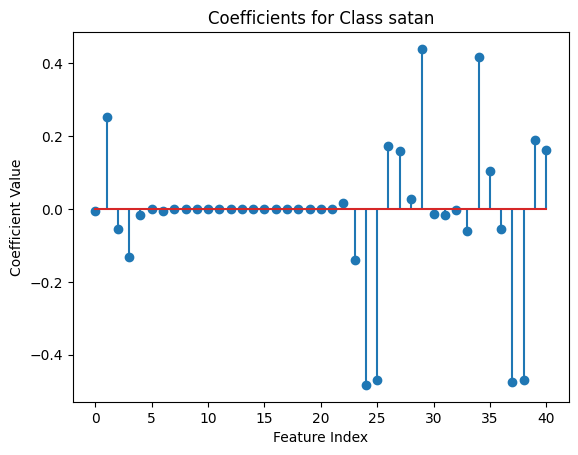

In [22]:
# Index 5: ipsweep
# Index 10: nmap
# Index 14: portsweep
# Index 16: satan

print(len(Xw))

# Create a list to store the coefficients for each classifier
coefficients = []
coefList = [5, 10, 14, 16]

# Fit a logistic regression model for each class
for class_label in coefList:
    # Create a binary label vector for the current class
    y_binary = (y == class_label).astype(int)
    
    # Fit the logistic regression model
    logReg_w = LogisticRegression(max_iter=100)
    logReg_w.fit(Xw, y_binary.values.ravel())
    
    # Get the coefficients for this classifier and flatten them
    W = logReg_w.coef_.flatten()
    
    # Append the coefficients to the list
    coefficients.append(W)

# Convert the list of coefficients to a NumPy array
coefficients = np.array(coefficients)

# Plot the coefficients for each classifier
for i in range(coefficients.shape[0]):
    plt.figure()
    plt.stem(coefficients[i])
    plt.title(f'Coefficients for Class {IC[coefList[i]]}')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')

    idx1=np.argsort(np.abs(W))[-1]
    idx2=np.argsort(np.abs(W))[-2]
    idx3=np.argsort(np.abs(W))[-3]

    heavy=[x_labels_w[idx1], x_labels_w[idx2],x_labels_w[idx3]]
    print(heavy)

#### Train test and split - 80% training, 20% testing ####

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import scale
# Scale the data
Xs = scale(X_train)

#### Fit model ####

In [24]:
logReg = LogisticRegression(max_iter=100)

logReg.fit(X_train, y_train.values.ravel())

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Obtain model accuracy scores ####

In [25]:
from sklearn.metrics import accuracy_score

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9834023327473109
Test score:  0.9837679113788453


#### Plot confusion matrix ####

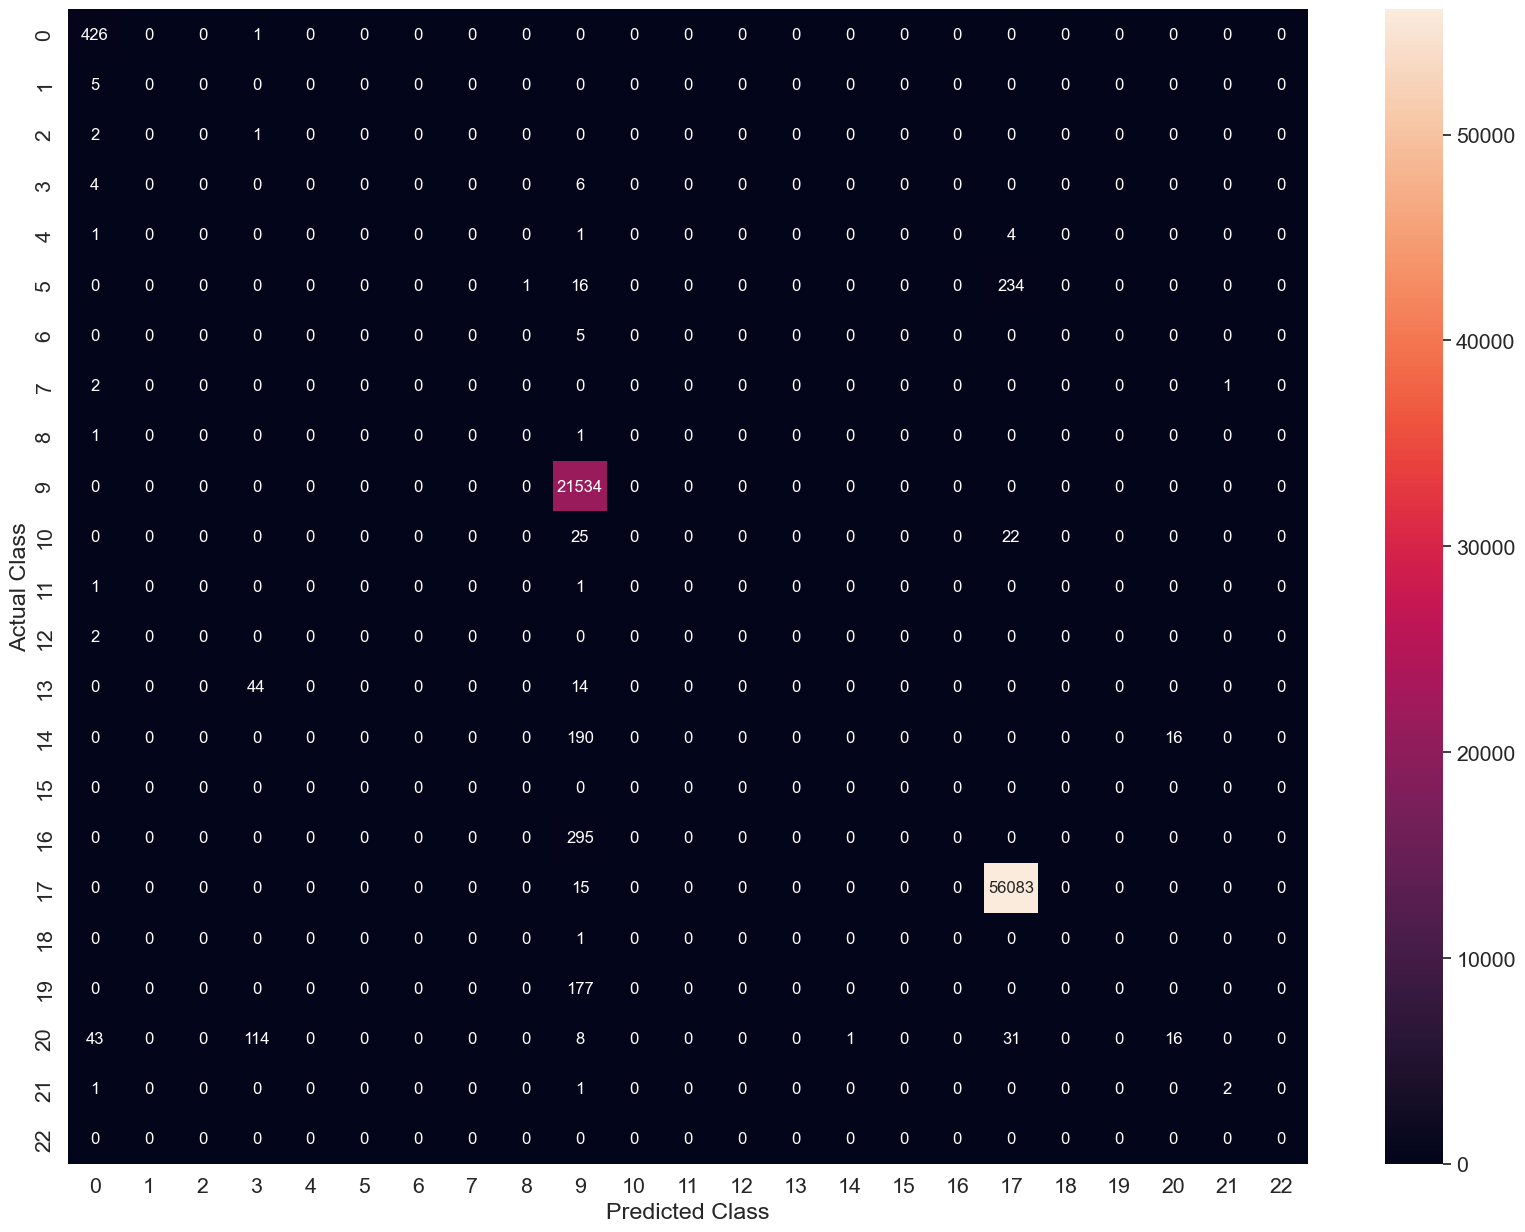

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


labels1 = ['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'perl' 'phf'
 'pod' 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop'
 'warezclient' 'warezmaster']

labels2 = np.arange(23)

C = confusion_matrix(y_test, y_test_pred, labels=labels2)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
sns.heatmap(C, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels2, yticklabels=labels2)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
 
plt.show()

# L1 Regularization #

#### Determine heaviest weights for each probe attack ####

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['diff_srv_rate', 'wrong_fragment', 'logged_in']
['diff_srv_rate', 'wrong_fragment', 'logged_in']
['diff_srv_rate', 'wrong_fragment', 'logged_in']
['diff_srv_rate', 'wrong_fragment', 'logged_in']


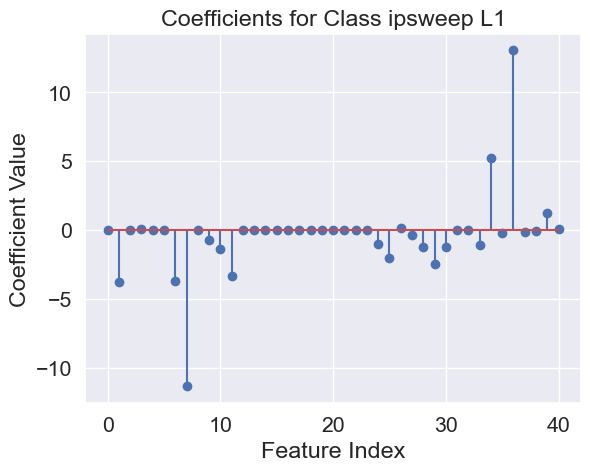

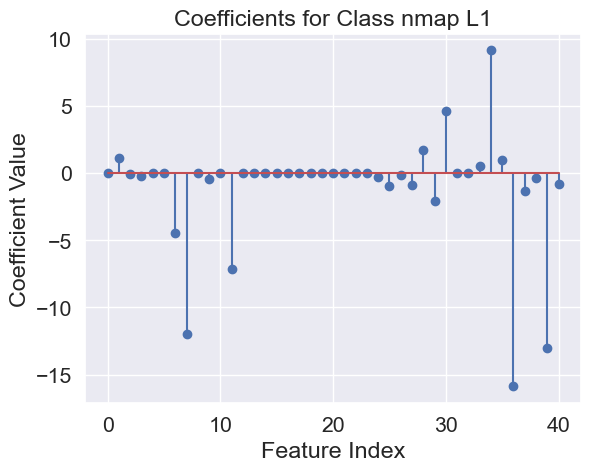

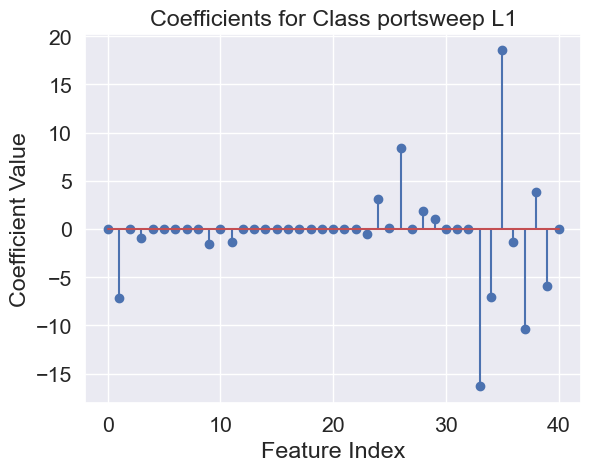

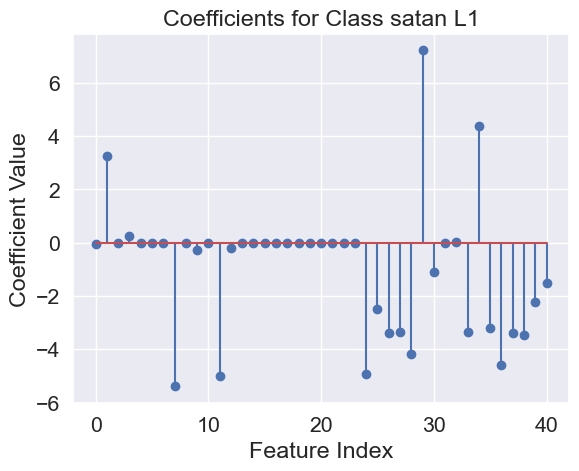

In [27]:
# Index 5: ipsweep
# Index 10: nmap
# Index 14: portsweep
# Index 16: satan

# Create a list to store the coefficients for each classifier
coefficients = []
coefList = [5, 10, 14, 16]

# Fit a logistic regression model for each class
for class_label in coefList:
    # Create a binary label vector for the current class
    y_binary = (y == class_label).astype(int)
    
    # Fit the logistic regression model
    logReg_w = LogisticRegression(penalty='l1', max_iter=100, solver='liblinear')
    logReg_w.fit(Xw, y_binary.values.ravel())
    
    # Get the coefficients for this classifier and flatten them
    W = logReg_w.coef_.flatten()
    
    # Append the coefficients to the list
    coefficients.append(W)

# Convert the list of coefficients to a NumPy array
coefficients = np.array(coefficients)

# Plot the coefficients for each classifier
for i in range(coefficients.shape[0]):
    plt.figure()
    plt.stem(coefficients[i])
    plt.title(f'Coefficients for Class {IC[coefList[i]]} L1')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')

    idx1=np.argsort(np.abs(W))[-1]
    idx2=np.argsort(np.abs(W))[-2]
    idx3=np.argsort(np.abs(W))[-3]

    heavy=[x_labels_w[idx1], x_labels_w[idx2],x_labels_w[idx3]]
    print(heavy)

#### Fit model ####

In [28]:
logReg = LogisticRegression(penalty='l1', max_iter=100, solver='liblinear')

logReg.fit(X_train, y_train.values.ravel())


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='l1', solver='liblinear')

#### Obtain model accuracy scores ####

In [29]:
y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.999782604586098
Test score:  0.9996723336147904


#### Plot confusion matrix ####

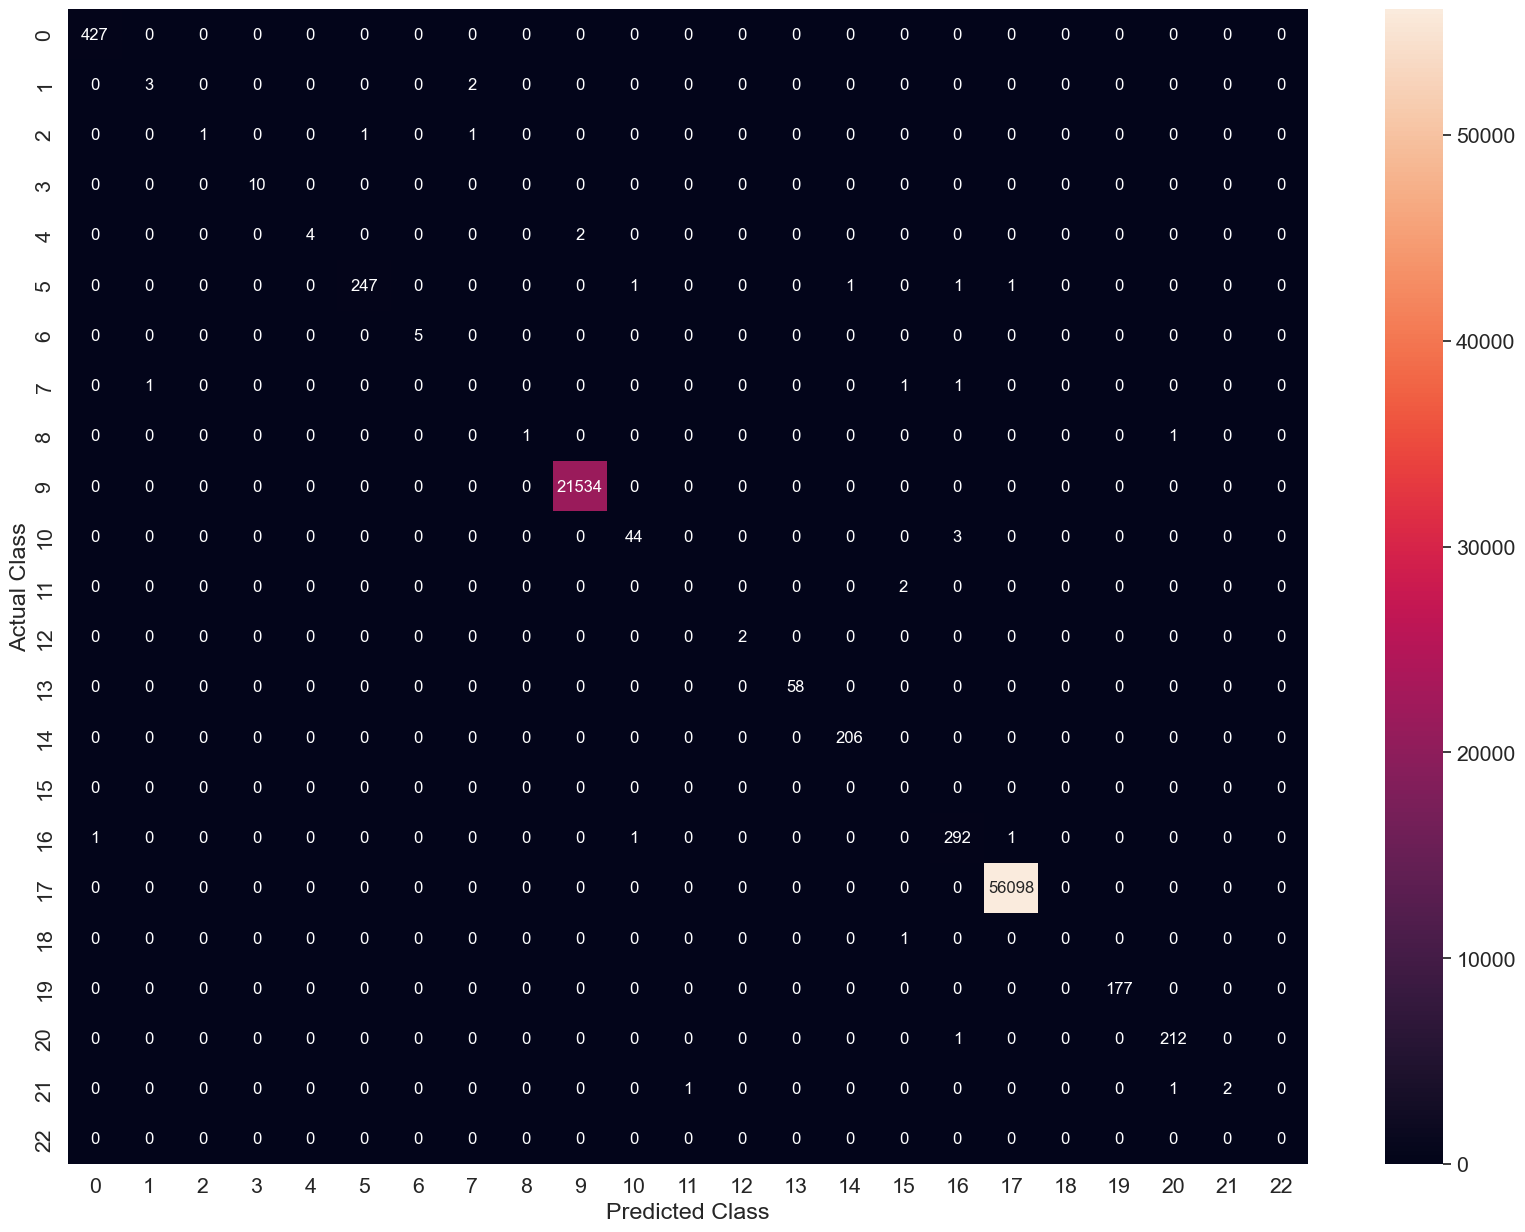

In [30]:
labels2 = np.arange(23)

C = confusion_matrix(y_test, y_test_pred, labels=labels2)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
sns.heatmap(C, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels2, yticklabels=labels2)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
 
plt.show()

# L2 Regularization #

#### Determine heaviest weights for each probe attack ####

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']
['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']
['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']
['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']


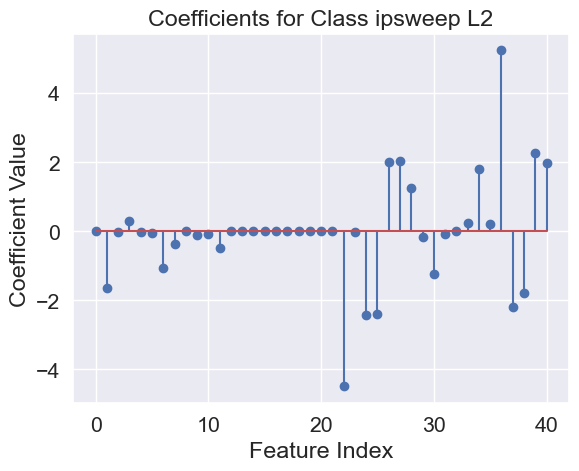

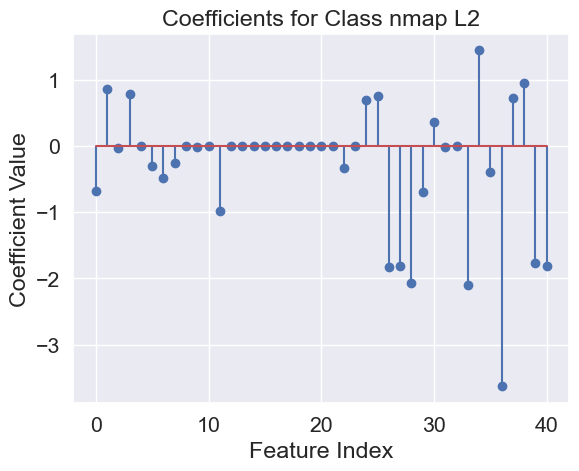

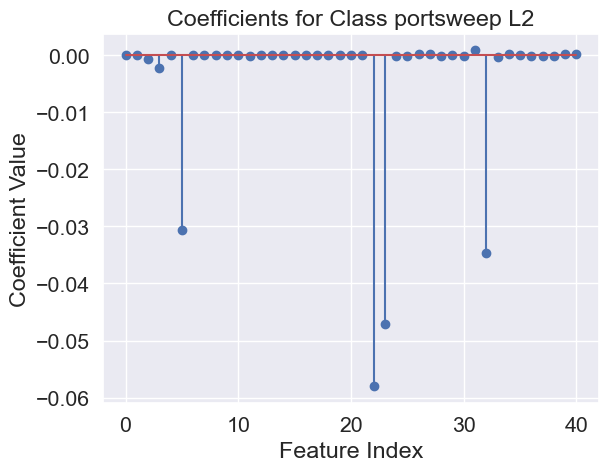

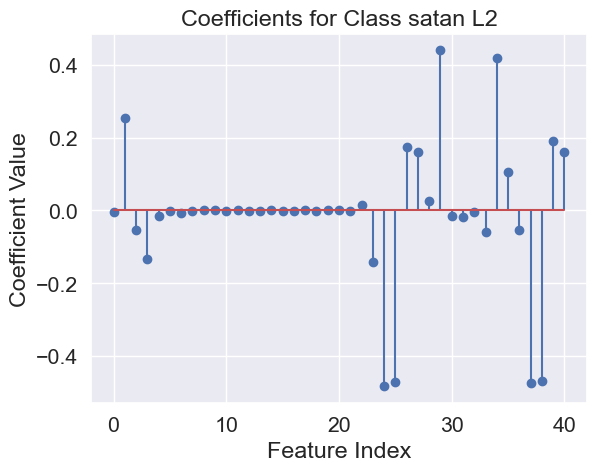

In [31]:
# Index 5: ipsweep
# Index 10: nmap
# Index 14: portsweep
# Index 16: satan

# Create a list to store the coefficients for each classifier
coefficients = []
coefList = [5, 10, 14, 16]

# Fit a logistic regression model for each class
for class_label in coefList:
    # Create a binary label vector for the current class
    y_binary = (y == class_label).astype(int)
    
    # Fit the logistic regression model
    logReg_w = LogisticRegression(penalty='l2', max_iter=100)
    logReg_w.fit(Xw, y_binary.values.ravel())
    
    # Get the coefficients for this classifier and flatten them
    W = logReg_w.coef_.flatten()
    
    # Append the coefficients to the list
    coefficients.append(W)

# Convert the list of coefficients to a NumPy array
coefficients = np.array(coefficients)

# Plot the coefficients for each classifier
for i in range(coefficients.shape[0]):
    plt.figure()
    plt.stem(coefficients[i])
    plt.title(f'Coefficients for Class {IC[coefList[i]]} L2')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')

    idx1=np.argsort(np.abs(W))[-1]
    idx2=np.argsort(np.abs(W))[-2]
    idx3=np.argsort(np.abs(W))[-3]

    heavy=[x_labels_w[idx1], x_labels_w[idx2],x_labels_w[idx3]]
    print(heavy)

#### Fit model ####

In [32]:
logReg = LogisticRegression(penalty='l2', max_iter=100)

logReg.fit(X_train, y_train.values.ravel())


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Obtain model accuracy scores ####

In [33]:
y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9834023327473109
Test score:  0.9837679113788453


#### Plot confusion matrix ####

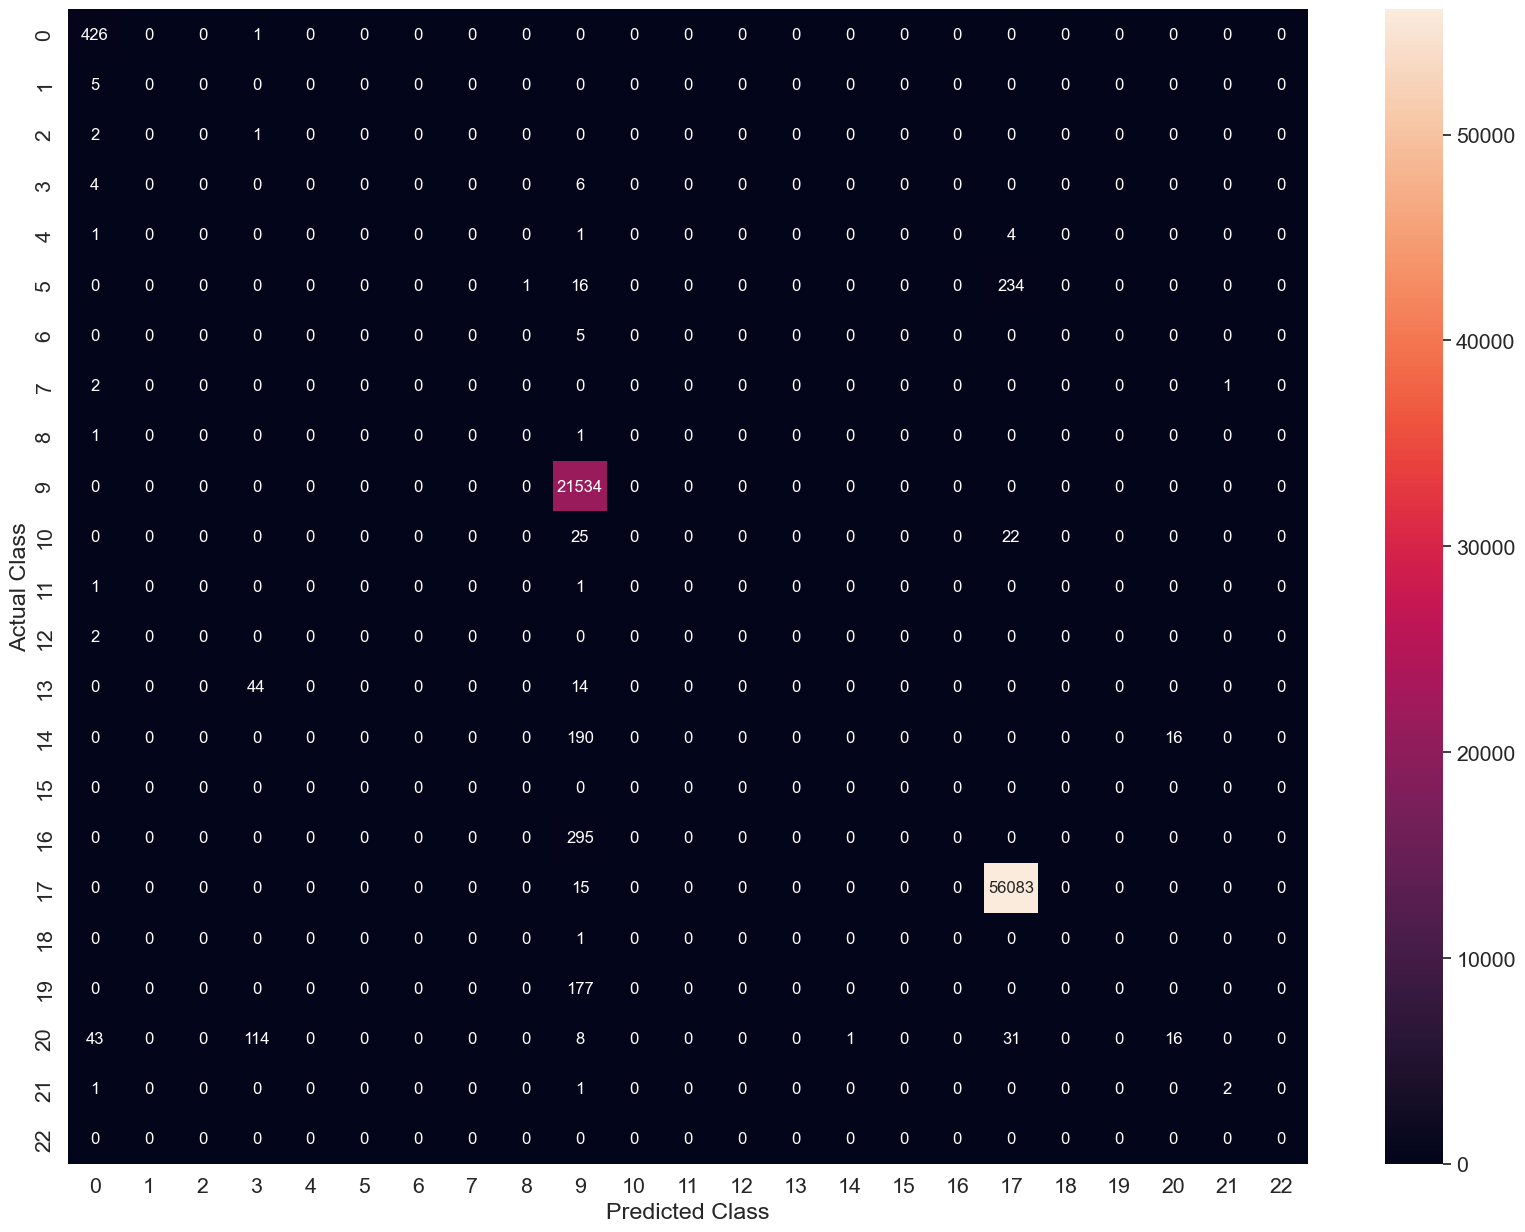

In [34]:
labels2 = np.arange(23)

C = confusion_matrix(y_test, y_test_pred, labels=labels2)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
sns.heatmap(C, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels2, yticklabels=labels2)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
 
plt.show()

# L2 Regularization with different strengths #

## .001 Strength ##

In [35]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=.001)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.983556714997763
Test score:  0.983881334358341


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## .01 Strength #

In [36]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=.01)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9832258958896514
Test score:  0.9835662705264087


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## .1 Strength ##

In [37]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=.1)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9833550728747236
Test score:  0.9837175011657362


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 1 Strength ##

In [38]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=1)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9834023327473109
Test score:  0.9837679113788453


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 10 Strength ##

In [39]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=10)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9834842498597957
Test score:  0.9838435266985092


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 100 Strength ##

In [40]:
logReg = LogisticRegression(penalty='l2', max_iter=100, C=100)

logReg.fit(X_train, y_train.values.ravel())

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9835031538088307
Test score:  0.9838435266985092


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
